# Football Summer 2025/26 Transfer Window Analysis

The transfer window has just closed for most teams, so I wanted to take a deeper look at what happened this summer - which leagues or teams were the most active on the market, which spent the most, and which earned the most.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("transfermarkt_data.csv")
df.head()

,Club,Expenditure,Arrivals,Income,Departures,Balance,League
0,Liverpool FC,€484.68m,15,€219.50m,12,€-265.18m,premier-league
1,Chelsea FC,€328.15m,26,€332.25m,24,€4.10m,premier-league
2,Arsenal FC,€293.50m,15,€10.30m,14,€-283.20m,premier-league
3,Newcastle United,€278.85m,12,€176.00m,11,€-102.85m,premier-league
4,Manchester United,€250.70m,13,€74.20m,13,€-176.50m,premier-league


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Club         286 non-null    object
 1   Expenditure  286 non-null    object
 2   Arrivals     286 non-null    int64 
 3   Income       286 non-null    object
 4   Departures   286 non-null    int64 
 5   Balance      286 non-null    object
 6   League       286 non-null    object
dtypes: int64(2), object(5)
memory usage: 15.8+ KB


In [4]:
def clean_currency(currency_string):
    if isinstance(currency_string, str):
        currency_string = currency_string.replace('€', '')
        if currency_string.endswith('m'):
            return float(currency_string[:-1]) * 1000000
        elif currency_string.endswith('k'):
            return float(currency_string[:-1]) * 1000
    try:
        return float(currency_string)
    except ValueError:
        return None

df['Expenditure'] = df['Expenditure'].apply(clean_currency)
df['Income'] = df['Income'].apply(clean_currency)
df['Balance'] = df['Balance'].apply(clean_currency)

df.head()

,Club,Expenditure,Arrivals,Income,Departures,Balance,League
0,Liverpool FC,484680000.0,15,219500000.0,12,-265180000.0,premier-league
1,Chelsea FC,328150000.0,26,332250000.0,24,4100000.0,premier-league
2,Arsenal FC,293500000.0,15,10300000.0,14,-283200000.0,premier-league
3,Newcastle United,278850000.0,12,176000000.0,11,-102850000.0,premier-league
4,Manchester United,250700000.0,13,74200000.0,13,-176500000.0,premier-league


In [5]:
df['Avg_Spending_Per_Arrival'] = np.where(df['Arrivals'] > 0, df['Expenditure'] / df['Arrivals'], 0)
df['Avg_Income_Per_Departure'] = np.where(df['Departures'] > 0, df['Income'] / df['Departures'], 0)

df.head()

,Club,Expenditure,Arrivals,Income,Departures,Balance,League,Avg_Spending_Per_Arrival,Avg_Income_Per_Departure
0,Liverpool FC,484680000.0,15,219500000.0,12,-265180000.0,premier-league,3.231200e+07,1.829167e+07
1,Chelsea FC,328150000.0,26,332250000.0,24,4100000.0,premier-league,1.262115e+07,1.384375e+07
2,Arsenal FC,293500000.0,15,10300000.0,14,-283200000.0,premier-league,1.956667e+07,7.357143e+05
3,Newcastle United,278850000.0,12,176000000.0,11,-102850000.0,premier-league,2.323750e+07,1.600000e+07
4,Manchester United,250700000.0,13,74200000.0,13,-176500000.0,premier-league,1.928462e+07,5.707692e+06


In [6]:
sns.set(style="darkgrid", context="talk", palette="magma")

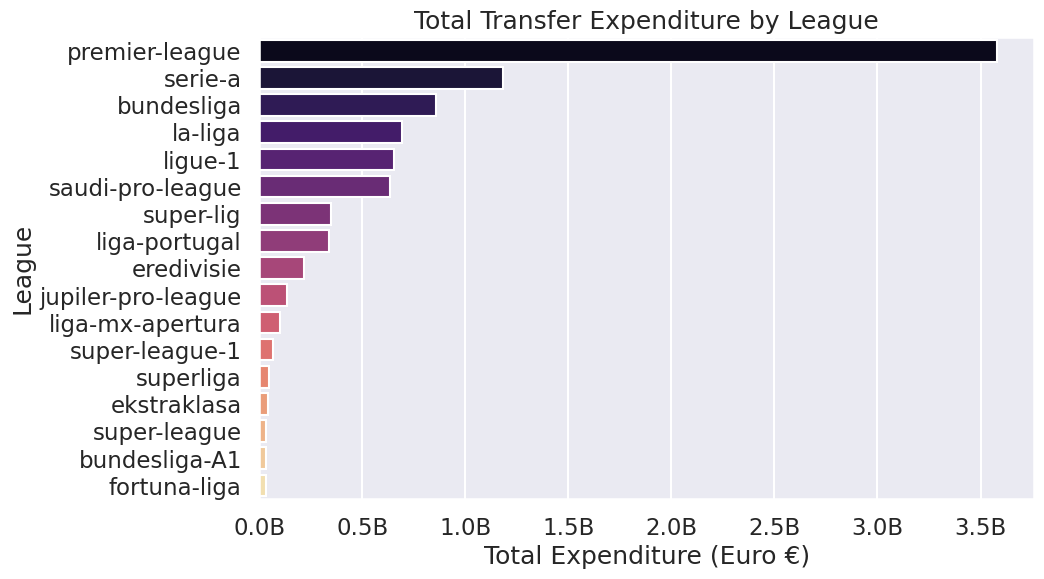

In [7]:
total_expenditure_by_league = df.groupby('League')['Expenditure'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_expenditure_by_league.values, y=total_expenditure_by_league.index, palette='magma')
plt.title('Total Transfer Expenditure by League')
plt.xlabel('Total Expenditure (Euro €)')
plt.ylabel('League')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
plt.show()

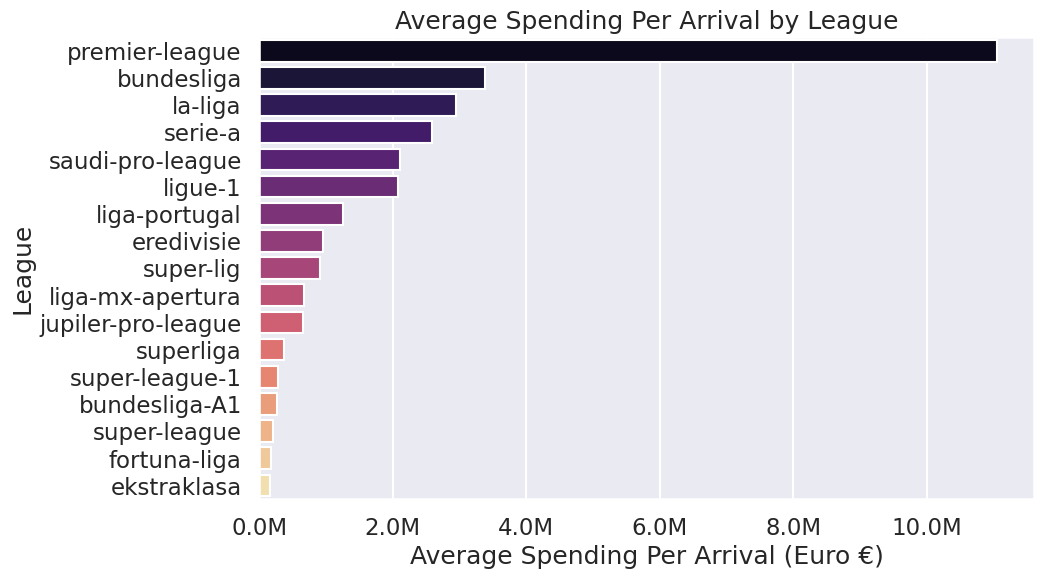

In [8]:
avg_spending_by_league = df.groupby('League')['Avg_Spending_Per_Arrival'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending_by_league.values, y=avg_spending_by_league.index, palette='magma')
plt.title('Average Spending Per Arrival by League')
plt.xlabel('Average Spending Per Arrival (Euro €)')
plt.ylabel('League')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.show()

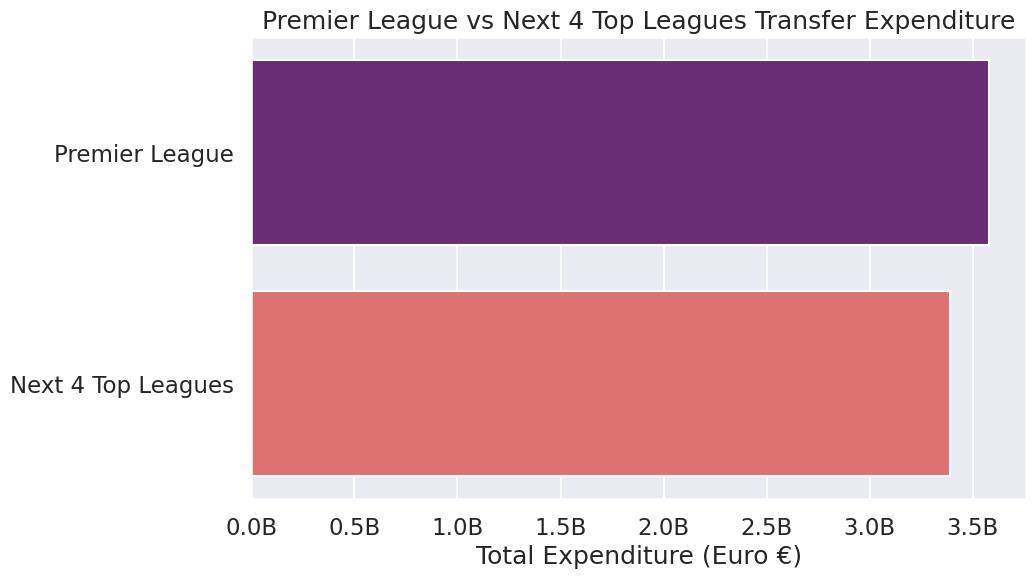

In [9]:
pl_spending = total_expenditure_by_league.get('premier-league', 0)

next_leagues_spending = total_expenditure_by_league.drop('premier-league').head(4).sum()

comparison = {'Premier League': pl_spending, 'Next 4 Top Leagues': next_leagues_spending}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(comparison.values()), y=list(comparison.keys()), palette='magma')
plt.title('Premier League vs Next 4 Top Leagues Transfer Expenditure')
plt.xlabel('Total Expenditure (Euro €)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
plt.show()

I guess the charts speak for themselves xD. The enormous financial resources of English clubs often leave other leagues helpless in the battle for top players against Premier League teams. This dominance comes from, among other things, unrivaled TV rights, sponsors, and investors, allowing clubs not only to buy players but also to offer significantly higher salaries than their competitors.

Additional obstacles for leagues such as La Liga are restrictive financial regulations - due to overly rigid salary caps, Spanish clubs are often forced to sell their best players or are even unable to register new players despite transfers. Clubs like Barcelona have to be creative in circumventing the rules, and some teams from lower positions do not know until the last days of the transfer window whether they will be able to register new players (Thank you Mr. Tebas).

The Saudi league is increasingly becoming a serious player in the market, tempting players primarily with high salaries. And so, in the 2025 window, the biggest leagues barely outspent the Saudis in terms of total transfer market spending.

NOTE: NO MLS DATA

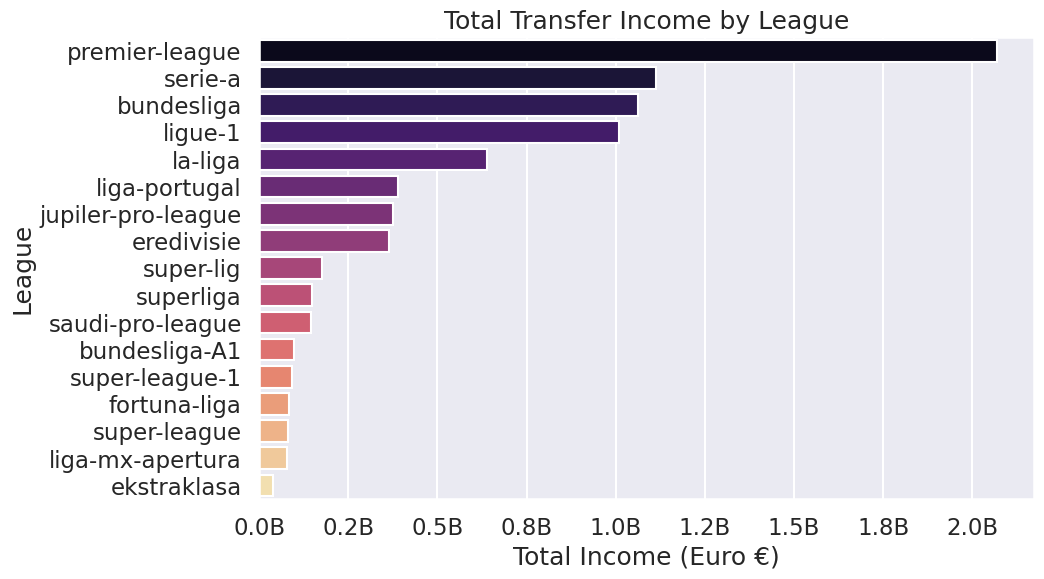

In [10]:
total_income_by_league = df.groupby('League')['Income'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_income_by_league.values, y=total_income_by_league.index, palette='magma')
plt.title('Total Transfer Income by League')
plt.xlabel('Total Income (Euro €)')
plt.ylabel('League')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
plt.show()

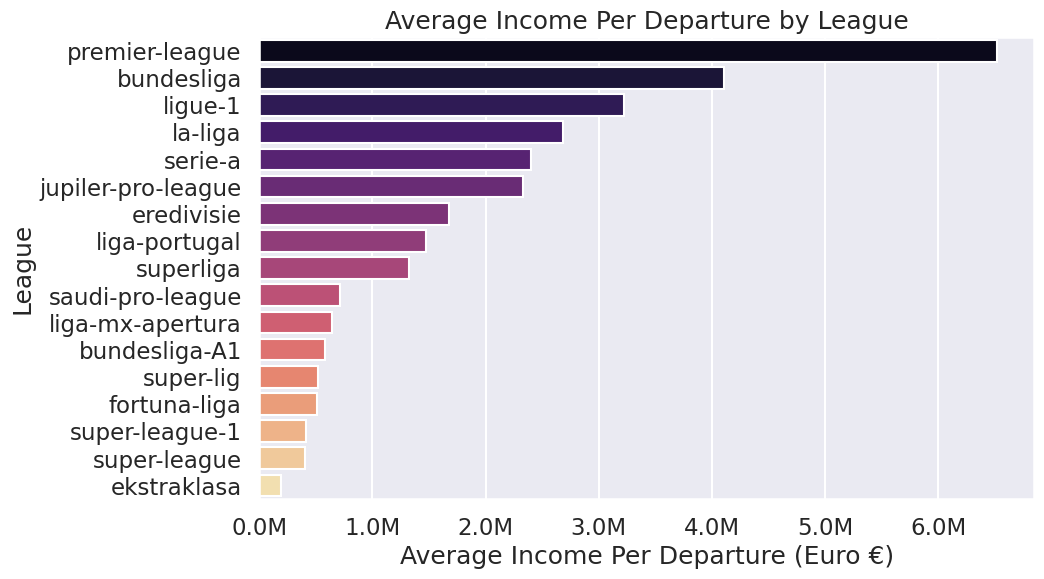

In [11]:
avg_income_by_league = df.groupby('League')['Avg_Income_Per_Departure'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_by_league.values, y=avg_income_by_league.index, palette='magma')
plt.title('Average Income Per Departure by League')
plt.xlabel('Average Income Per Departure (Euro €)')
plt.ylabel('League')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.show()

Premier League clubs maybe spend far more than any other league on player transfers, but they also generate the highest total income from sales. However, this is largely driven by intense activity within the domestic market - many high-value transfers take place between Premier League clubs themselves, amplifying both expenditure and revenue figures. In fact, a significant proportion of Premier League transfer income comes from internal deals, which makes the overall numbers even more striking compared to other leagues.

Outside England, most leagues can't match this level of financial circulation. While top leagues like Bundesliga, Serie A, Ligue 1, and La Liga hold strong positions in terms of income generated, they still trail the Premier League by a considerable margin. This dynamic allows English clubs not only to attract star players but also to remain competitive in selling talent, maintaining a unique balance between buying and selling. Such market power further solidifies the Premier League's dominance in global football finance.

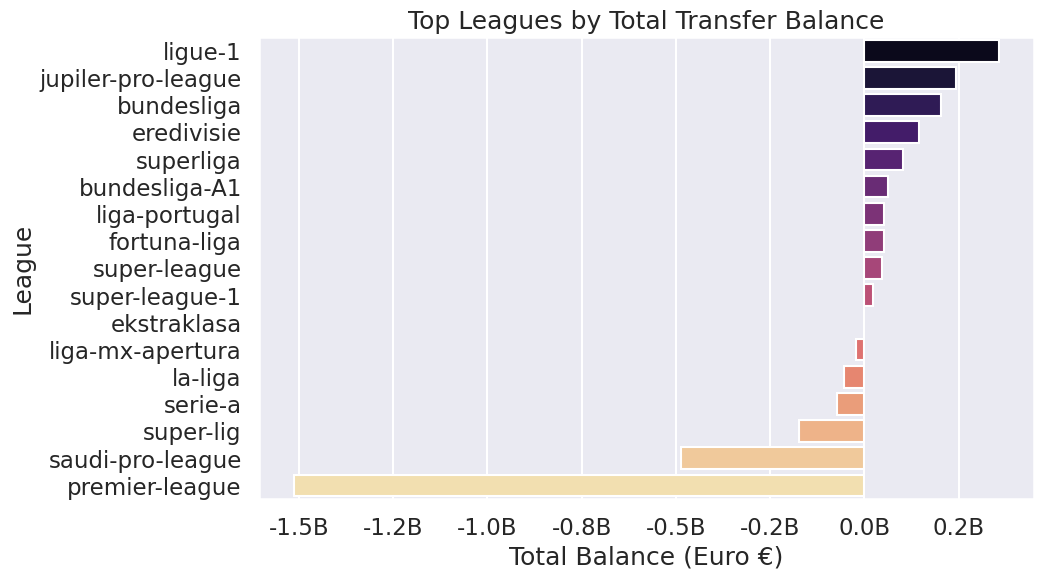

In [12]:
# Balance = Income - Expenditure
total_balance_by_league = df.groupby('League')['Balance'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_balance_by_league.values, y=total_balance_by_league.index, palette='magma')
plt.title('Top Leagues by Total Transfer Balance')
plt.xlabel('Total Balance (Euro €)')
plt.ylabel('League')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
plt.show()

This chart shows clear financial differences between leagues. Ligue 1, Bundesliga, Jupiler Pro League, and Eredivisie are the biggest financial winners, achieving the highest positive transfer balances, which means they earned substantially more from player sales than they spent on signings. Interestingly, smaller leagues such as the Jupiler Pro League and Eredivisie also boast large profits, demonstrating their effectiveness in developing and exporting talent.

On the opposite end, financial powerhouses such as the Premier League and Saudi Pro League record the deepest negative balances. Their transfer strategies are focused on aggressive spending - outpacing any income from sales - and reinforcing their squads at almost any cost. This contrast underscores the different market roles and financial tactics of Europe's biggest and smaller leagues.

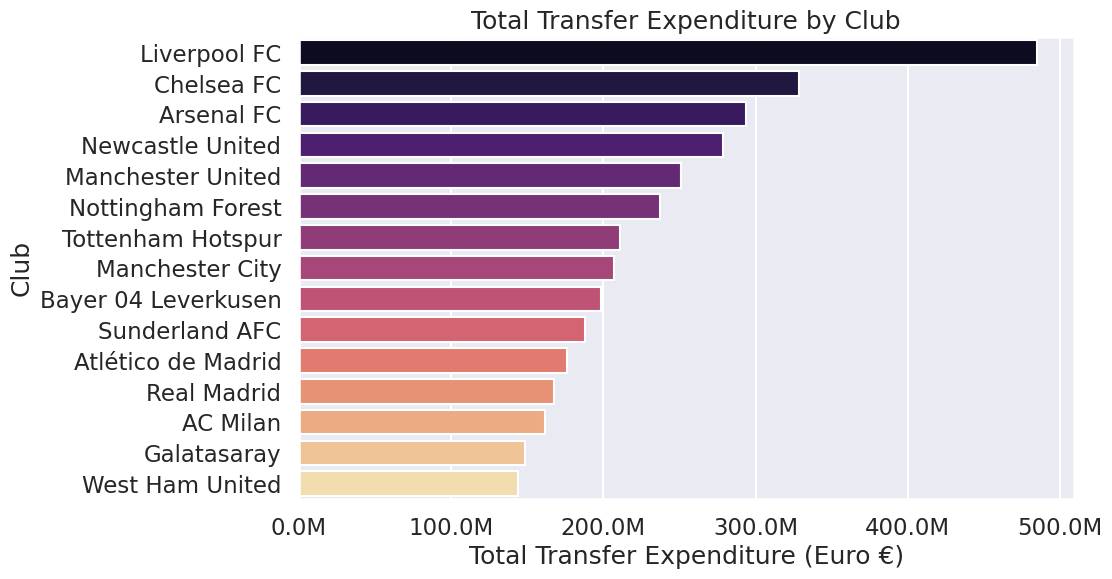

In [13]:
total_expenditure_by_club = df.set_index('Club')['Expenditure'].sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_expenditure_by_club.values, y=total_expenditure_by_club.index, palette='magma')
plt.title('Total Transfer Expenditure by Club')
plt.xlabel('Total Transfer Expenditure (Euro €)')
plt.ylabel('Club')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.show()

10 of the top 15 biggest spenders this season are from England, with 8 of them topping the charts. A clear display of dominance - an undisputed show of financial power.

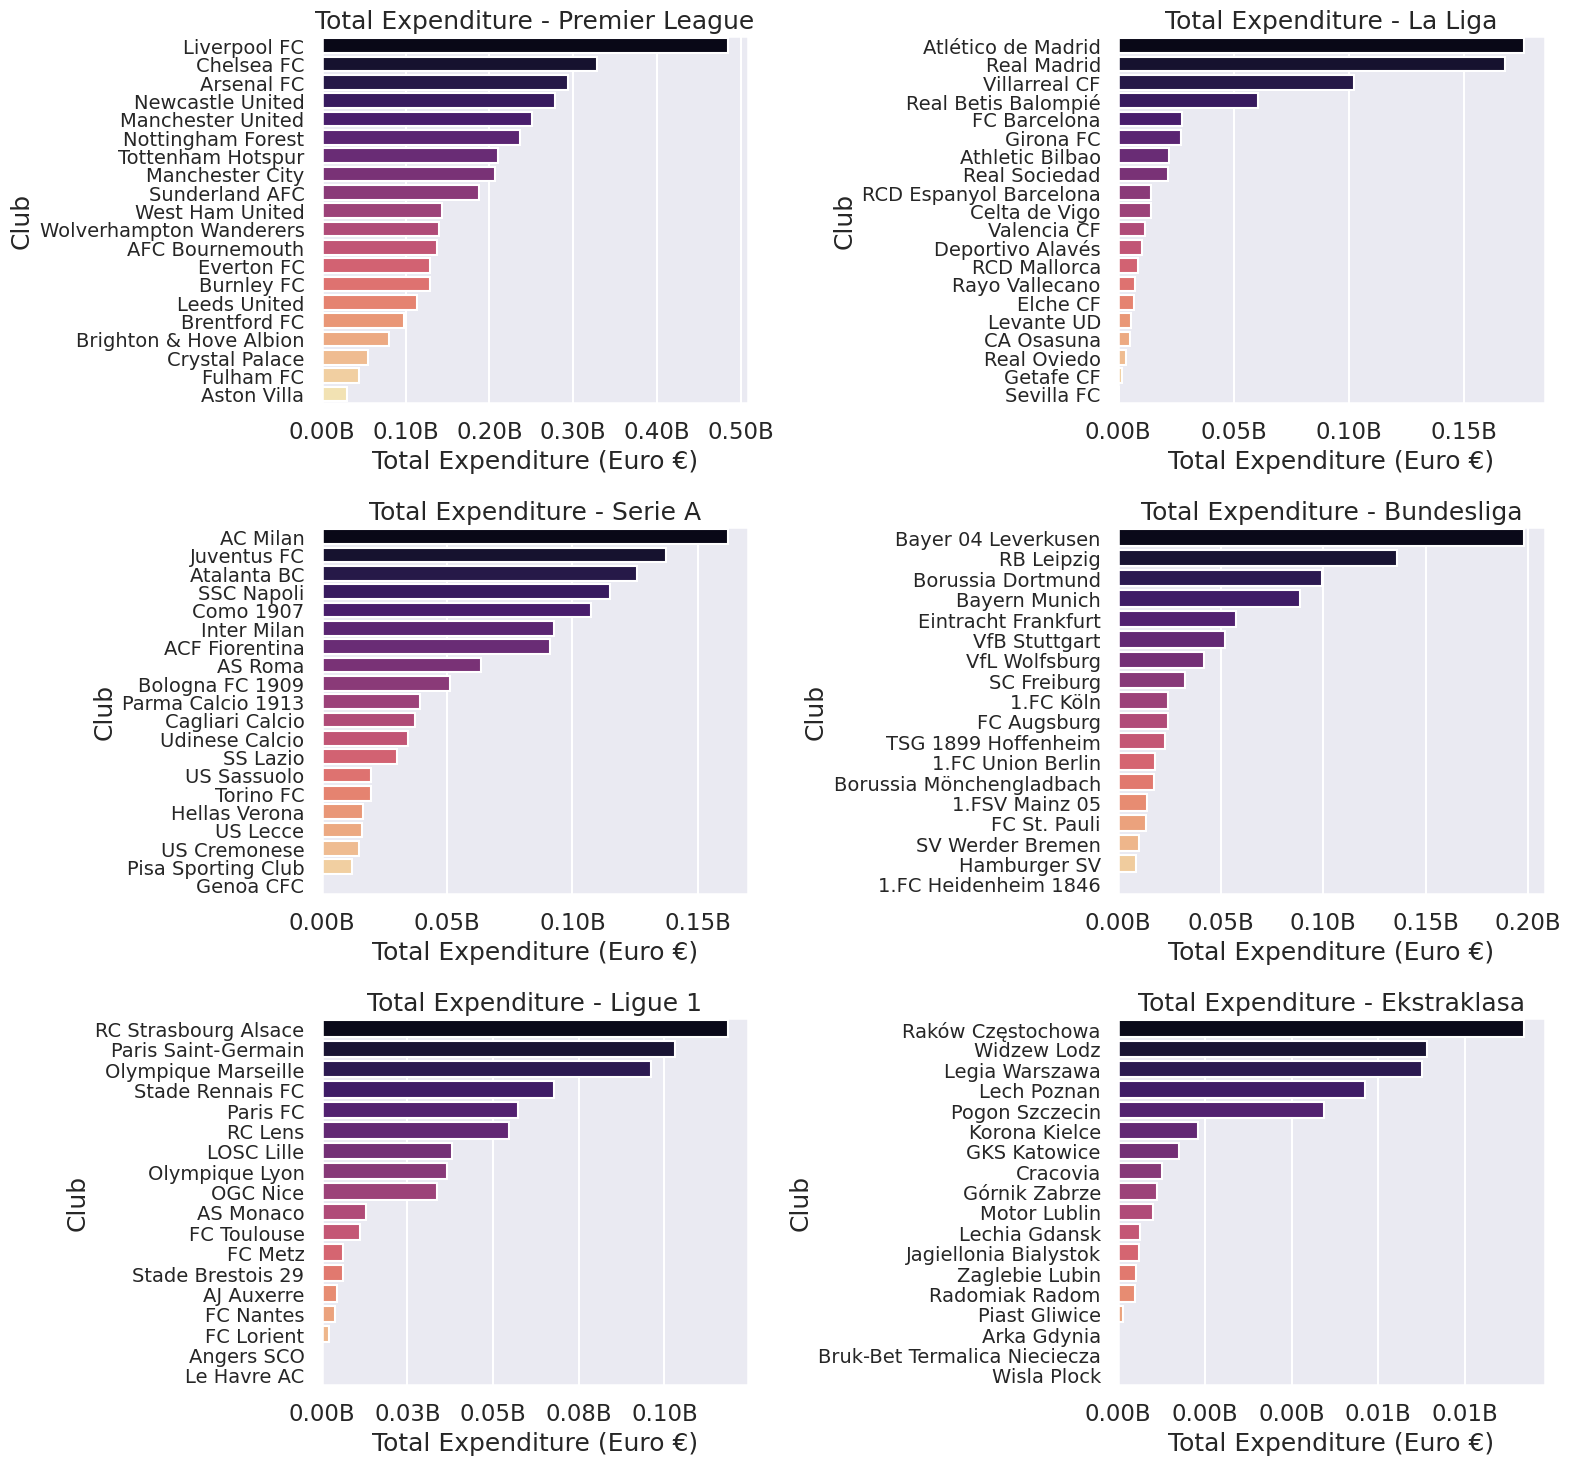

In [14]:
top_leagues = ['premier-league', 'la-liga', 'serie-a', 'bundesliga', 'ligue-1', 'ekstraklasa']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

for i, league in enumerate(top_leagues):
    league_df = df[df['League'] == league]

    top_clubs = league_df.set_index('Club')['Expenditure'].sort_values(ascending=False)

    sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma', ax=axes[i])

    axes[i].set_title(f'Total Expenditure - {league.replace("-", " ").title()}')
    axes[i].set_xlabel('Total Expenditure (Euro €)')
    axes[i].set_ylabel('Club')
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.2f}B'))
    axes[i].tick_params(axis='y', labelsize=14)

if len(top_leagues) < len(axes):
    for j in range(len(top_leagues), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La Liga and the Bundesliga are the worst in terms of disparities between teams in the top leagues. Only a few teams can afford any significant transfers here. Of course, every league has its share of richer and poorer clubs, but in these two competitions, the gap is particularly striking. There is no gradual transition between the financial elites, the mid-tier, and the struggling sides, just a sharp divide. In contrast, the financial landscape in the other top leagues appears a bit more balanced.

Interestingly, this year in France, PSG, after a successful year and winning a treble, did not use its financial power, and was not even the leader in terms of money spent. Instead, the club topping charts was Strasbourg, owned by BlueCo, also the owner of Chelsea. Owning two teams in different leagues enables them to easily move players between clubs, setting a dangerous precedent in football. But that's a conversation for another day.

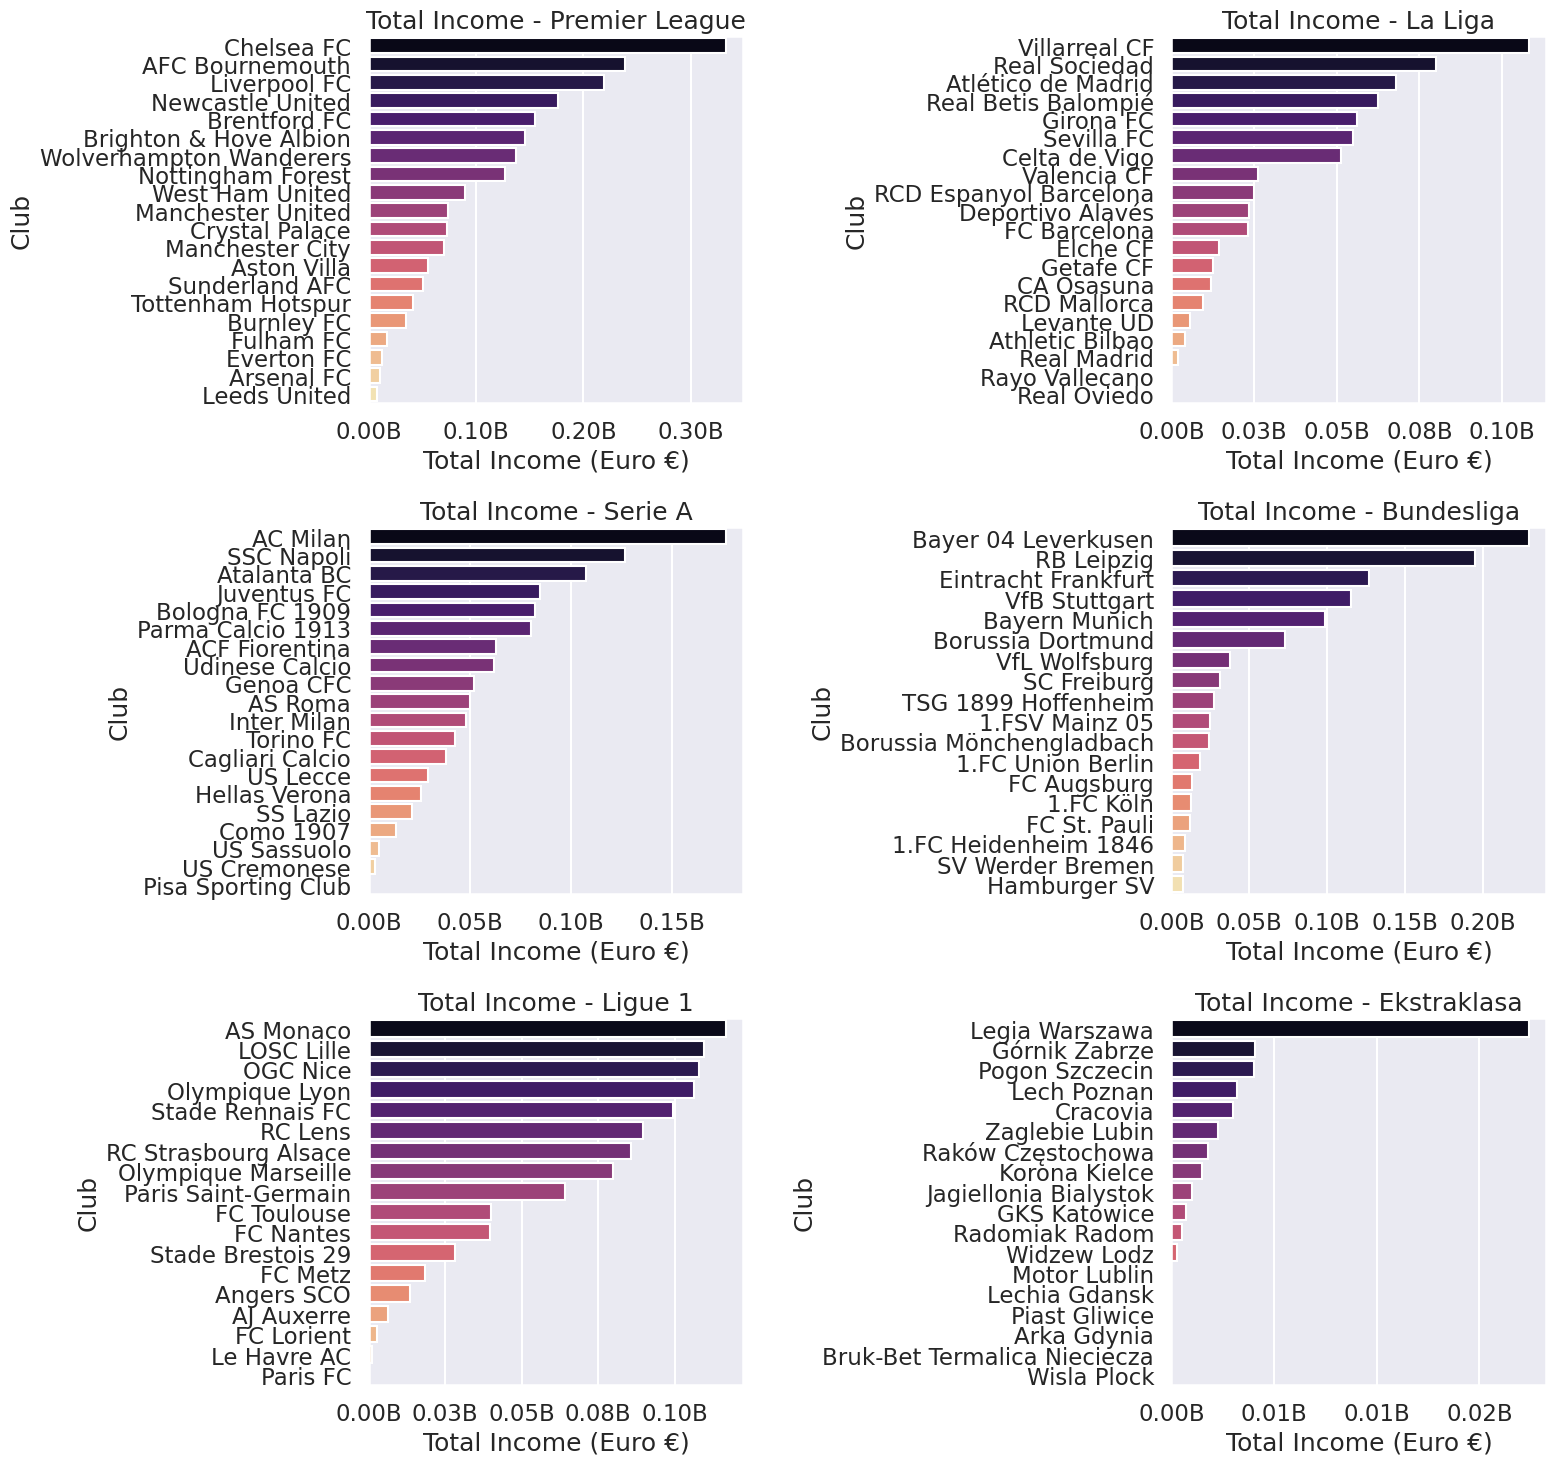

In [15]:
top_leagues = ['premier-league', 'la-liga', 'serie-a', 'bundesliga', 'ligue-1','ekstraklasa']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

for i, league in enumerate(top_leagues):
    league_df = df[df['League'] == league]

    top_clubs = league_df.set_index('Club')['Income'].sort_values(ascending=False)

    sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma', ax=axes[i])

    axes[i].set_title(f'Total Income - {league.replace("-", " ").title()}')
    axes[i].set_xlabel('Total Income (Euro €)')
    axes[i].set_ylabel('Club')
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.2f}B'))

if len(top_leagues) < len(axes):
    for j in range(len(top_leagues), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

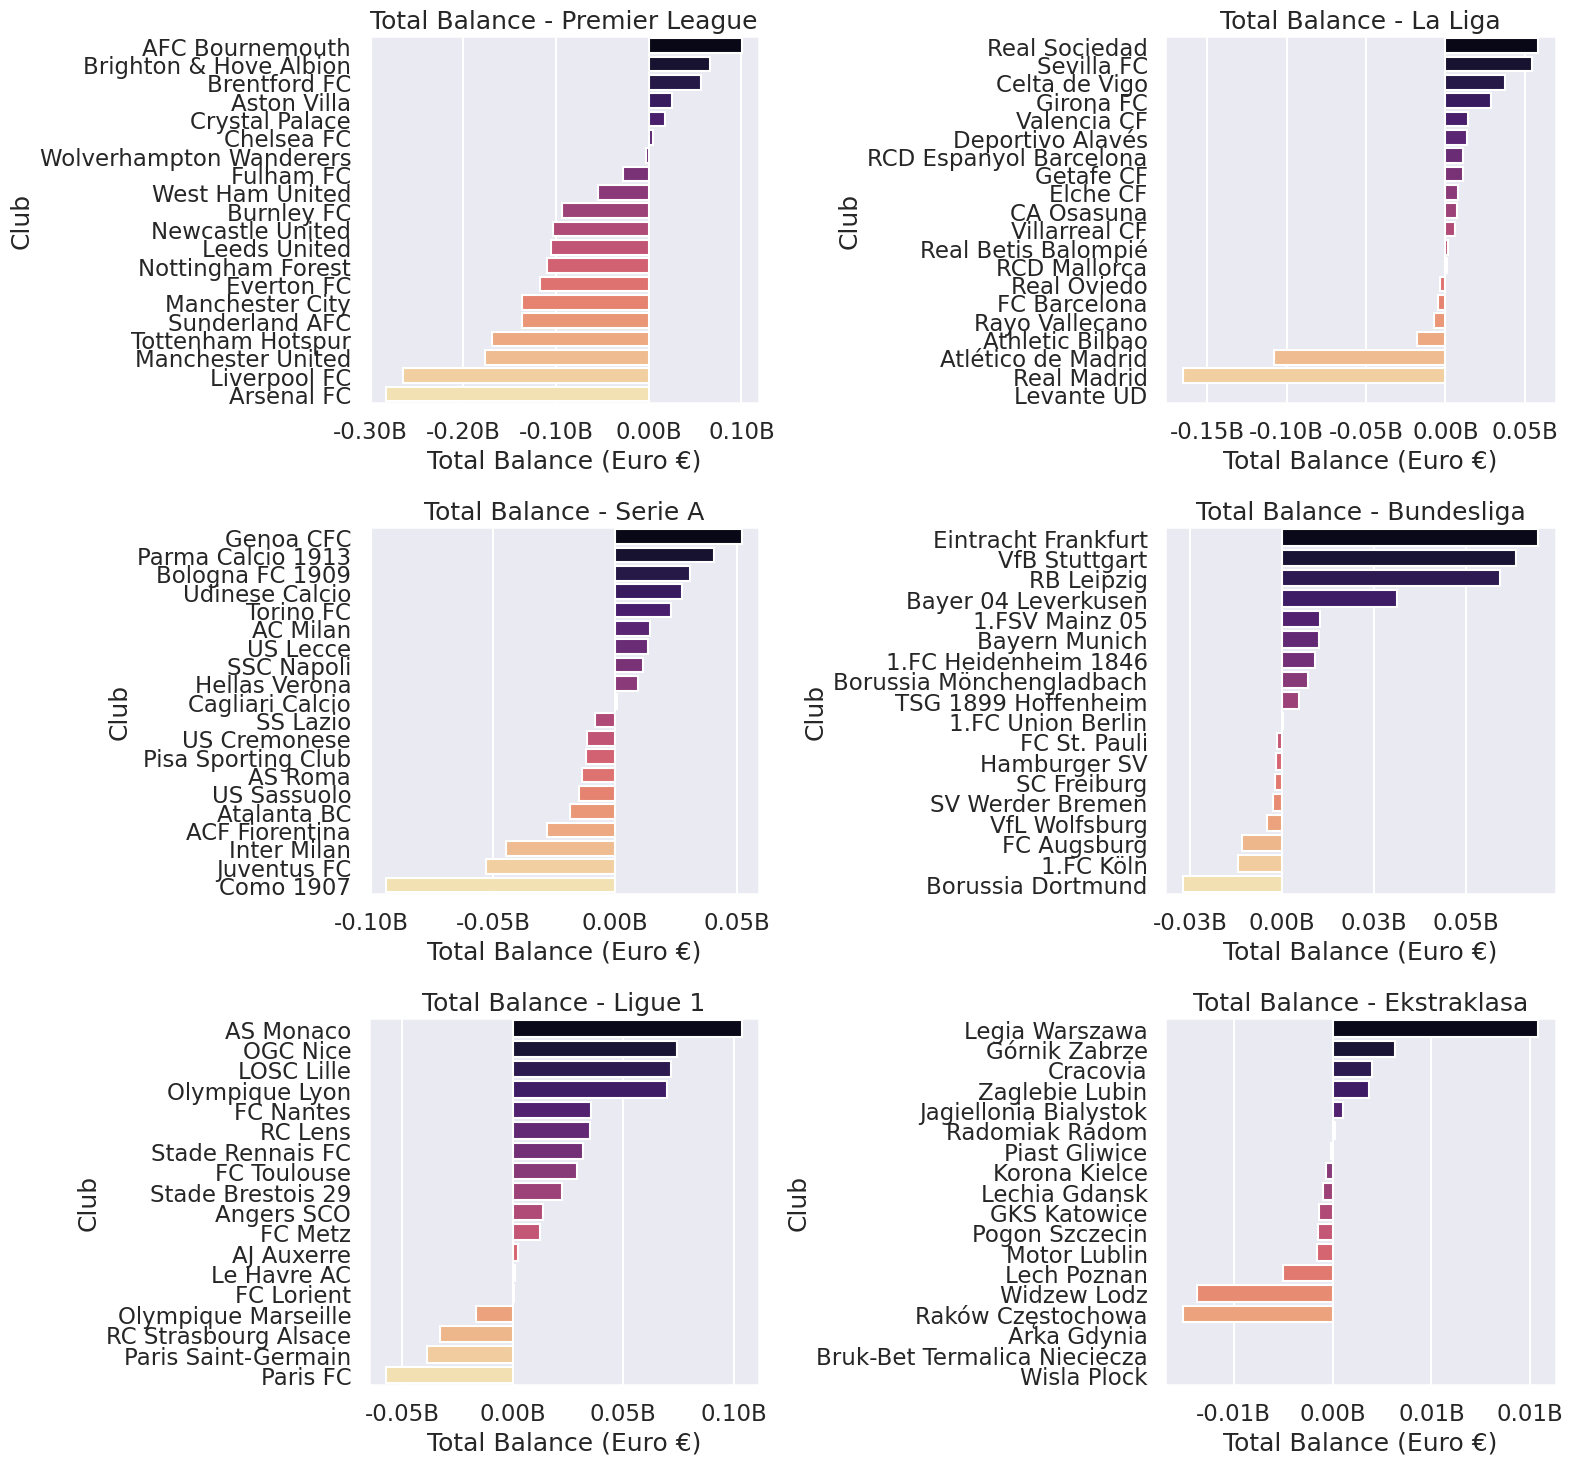

In [16]:
top_leagues = ['premier-league', 'la-liga', 'serie-a', 'bundesliga', 'ligue-1','ekstraklasa']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

for i, league in enumerate(top_leagues):
    league_df = df[df['League'] == league]

    top_clubs = league_df.set_index('Club')['Balance'].sort_values(ascending=False)

    sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma', ax=axes[i])

    axes[i].set_title(f'Total Balance - {league.replace("-", " ").title()}')
    axes[i].set_xlabel('Total Balance (Euro €)')
    axes[i].set_ylabel('Club')
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.2f}B'))

if len(top_leagues) < len(axes):
    for j in range(len(top_leagues), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Across Europe's top leagues, distinct financial philosophies are evident. Most clubs in Ligue 1 and Bundesliga maintain positive balances, prioritizing financial stability and careful squad building. Serie A teams also tend toward modest surpluses, reflecting caution in the transfer market. Meanwhile, Premier League clubs are much more willing to run substantial deficits, regularly investing far more in new signings than they recoup from sales. In La Liga, aggressive spending is limited to a handful of top clubs, while the majority of Spanish sides keep their finances balanced or positive. These patterns show that French, German, and Italian football prioritize sustainability, whereas only the Premier League consistently pursues bold, high-risk investment on a wide scale; in Spain, such spending is the exception, not the rule.

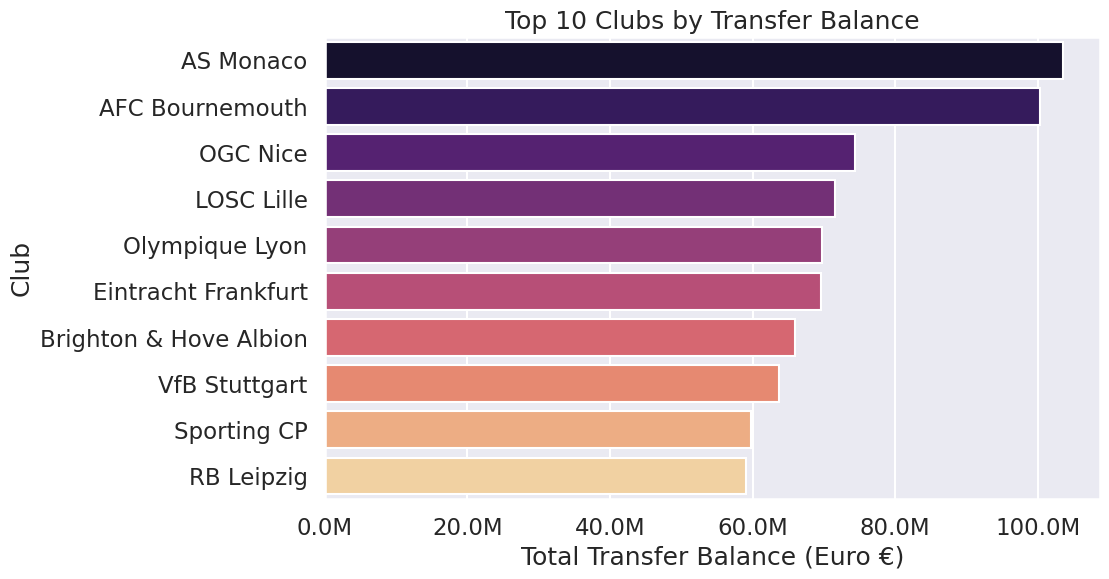

In [17]:
top_balance_by_club = df.set_index('Club')['Balance'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_balance_by_club.values, y=top_balance_by_club.index, palette='magma')
plt.title('Top 10 Clubs by Transfer Balance')
plt.xlabel('Total Transfer Balance (Euro €)')
plt.ylabel('Club')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.show()

Here are the 10 clubs that earned the most during this transfer window. Two of them, AS Monaco and AFC Bournemouth, managed to earn over €100 million.

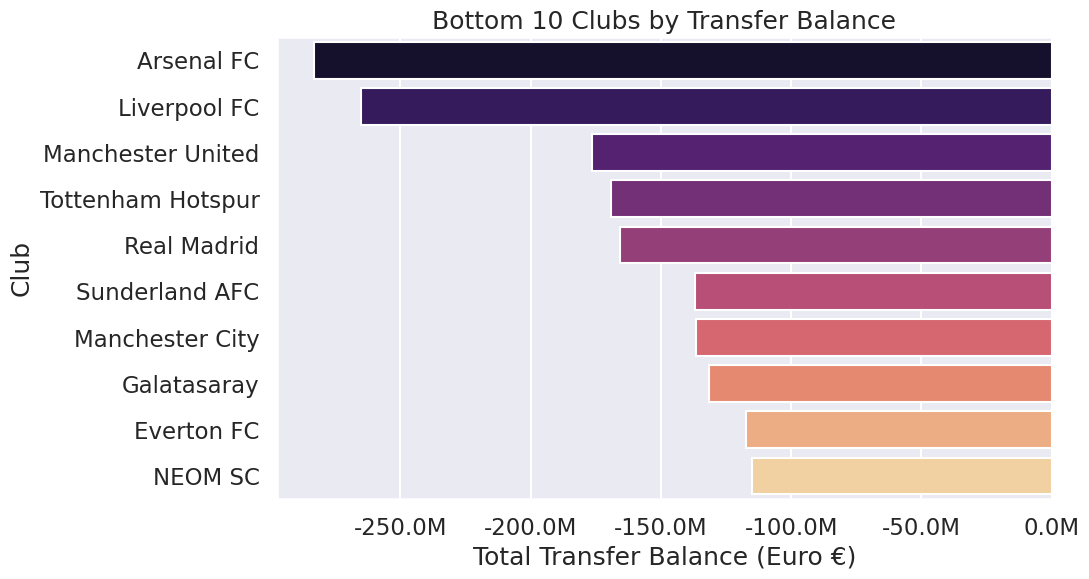

In [18]:
bottom_balance_by_club = df.set_index('Club')['Balance'].sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_balance_by_club.values, y=bottom_balance_by_club.index, palette='magma')
plt.title('Bottom 10 Clubs by Transfer Balance')
plt.xlabel('Total Transfer Balance (Euro €)')
plt.ylabel('Club')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
plt.show()

And these are the teams that lost the most during this transfer window. It comes as no surprise that English teams are at the top of the list, with Arsenal in first place. The list also includes Real Madrid (Spain), Galatasaray (Turkey), and NEOM SC (Saudi Arabia).

Data collected from [Transfermarkt](https://www.transfermarkt.com/)